# 2D Channel flow with imposed Twall and volumetric power

In [2]:
from trustutils import run
run.introduction("Simone Vandroux")

## Introduction 
 Validation made by : Simone Vandroux



 Report generated 25/01/2022

### Description

2D Channel flow with imposed wall temperature and imposed volumetric power for tests on extended volumes for the thermal equation

* Effect of the extended volumes for the diffusion terms and the mass terms of the heat conservation equation.
* Effect of the mesh
* Effect of the thermal convection scheme
* Academic case with analytical solution


In [3]:
run.TRUST_parameters("1.5.4 + atelier volumes etendus")

### TRUST parameters 
 * Version TRUST: 1.5.4 + atelier volumes etendus
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Problemes_en_cours/Bilan_chaleur_vef/build)

In [2]:
from trustutils import run
run.reset()
c1 = run.addCase("."    ,"Canal_2D_grossier.data",nbProcs=1)   
c2 = run.addCase("."    ,"Canal_2D.data",nbProcs=1)   
c3 = run.addCase("."    ,"Canal_2D_fin.data",nbProcs=1)   
c4 = run.addCase("."    ,"Canal_2D_amont.data",nbProcs=1)  
c5 = run.addCase("."    ,"Canal_2D_muscl.data",nbProcs=1)   
c6 = run.addCase("."    ,"Canal_2D_EF_stab.data",nbProcs=1)   
c7 = run.addCase("."    ,"Canal_2D_negligeable.data",nbProcs=1)
run.printCases()
run.runCases()
run.executeScript("calcul_nb_mailles")

### Test cases 
* ./Canal_2D_grossier.data : 
* ./Canal_2D.data : 
* ./Canal_2D_fin.data : 
* ./Canal_2D_amont.data : 
* ./Canal_2D_muscl.data : 
* ./Canal_2D_EF_stab.data : 
* ./Canal_2D_negligeable.data : 


Running **with Sserver**...
  => A total of 7 cases were (successfully) run in 496.6s.


## Test Description

$\textbf{Tested options}$\
Type of flow:		            Thermohydraulic laminar 2D \
Time scheme:                    Euler explicite\
Convection schemes:             Amont, muscl, EF_stab {volumes_etendus} \
Discretization:                 VEFPreP1b            \
Type of boundary conditions:    Momentum: periodic and symetry\
                                Energy: periodic and imposed temperature \
Type of fluid:                  properties of helium gas at 700°C           
 
$\textbf{Physical properties}$\
The physical properties correspond to the properties of Helium at 700°C\
$\rho = 4.40684\: kg\cdot m^{-3}$\
$\mu  = 4.46437e-05 Pa \cdots$ \
$\lambda = 0.344964 \: W\cdot m^{-1}\cdot K^{-1}$\
$Cp = 5193 J/kg/K$\
$\beta =  0.0014285714\:  K^{-1}$\
Pr =  0.67 
    
$\textbf{Boundary limits}$ \
Hydraulic: symetry at walls \
Energy: imposed temperature T=0 at walls, imposed volumetric power=1 in the calculation domain
  
$\textbf{Initial conditions}:$  
For this periodic calculation, the exact temperature solution is a parabolic profile:\
$T(y)=\frac{P}{\lambda}\cdot\frac{y}{2}\cdot(y-H)$ \
It is imposed as an initial temperature profile. 
  
$\textbf{Solving of equations}:$
  
$\textbf{Equation Navier_Stockes_standard}$:

Pressure solver: solveur_pression Gcp { precond ssor { omega 1.5 } seuil 1.e-10\
Source term:   Canal_perio { bord periox }  
                
$\textbf{Equation convection_diffusion_temperature}:$\
Sources term: Puissance_Thermique Champ_Uniforme 1 1

### geometry
<img src="build/cas_test_3.jpg">

### Coarse mesh

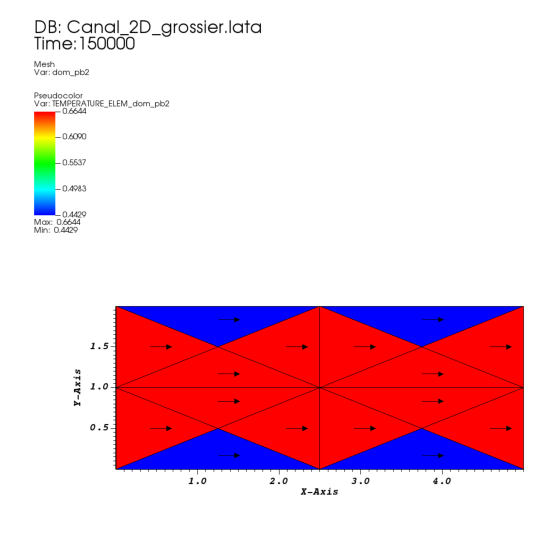

In [3]:
from trustutils import visit

Graph=visit.Show("./Canal_2D_grossier.lata","Pseudocolor","TEMPERATURE_ELEM_dom_pb2",mesh="dom_pb2")
Graph.addField("./Canal_2D_grossier.lata","Vector","VITESSE_ELEM_dom_pb2")
Graph.blackVector()
Graph.plot()

### Standard mesh

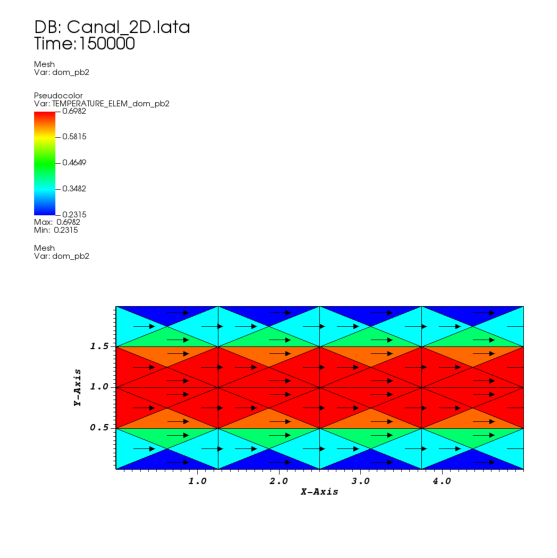

In [4]:
from trustutils import visit

Graph=visit.Show("./Canal_2D.lata","Pseudocolor","TEMPERATURE_ELEM_dom_pb2",mesh="dom_pb2")
Graph.addField("./Canal_2D.lata","Vector","VITESSE_ELEM_dom_pb2",mesh='dom_pb2')
Graph.blackVector()
Graph.plot()

### Refined mesh


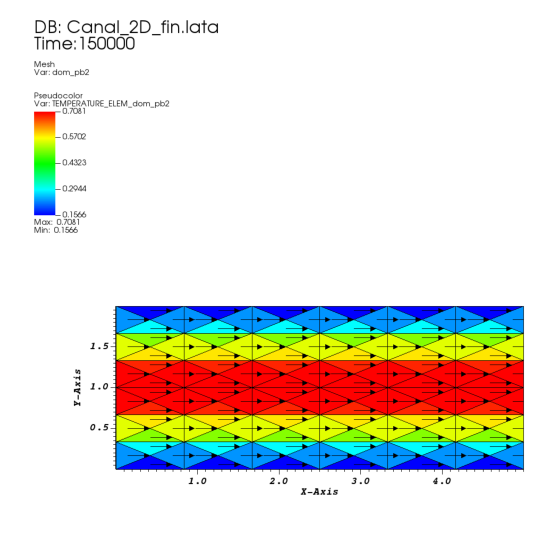

In [5]:
from trustutils import visit

Graph=visit.Show("./Canal_2D_fin.lata","Pseudocolor","TEMPERATURE_ELEM_dom_pb2",mesh="dom_pb2")
Graph.addField("./Canal_2D_fin.lata","Vector","VITESSE_ELEM_dom_pb2")
Graph.blackVector()
Graph.plot()

## Effect of the extended volumes on the mass terms

The objective of the calculation is to test the energy conservation in the calculation domain.\
The  integration  of  the  energy  conservation  equation  on  the  calculation  domain  leads  to  the  following equality:\
Flux at the wall \* Length of the wall = Imposed volumetric power  \* Domain Volume\ 
The Heat flux at the wall is taken from the file Diffusionchaleur.out\
The volumetric power is imposed in the input data set\
This calculation is an ’academic’ case, and is not supposed to have a real physical meaning.\
The calculations without the extended volumes will have errors on the heat flux calculation, as the volumeof the small cells next to the wall are not counted in the volume of the calculation domain.  The morerefined the mesh will be, the smaller this error will be.

### Heat flux as a function of time for various meshings

The  graph  below  shows  the  heat  flux  as  a  function  of  time  for  the  various  meshes  studied.   They  arecompared to the real power imposed in the input data set.\
The calculation stops when the calculation has reached a stationary sate.

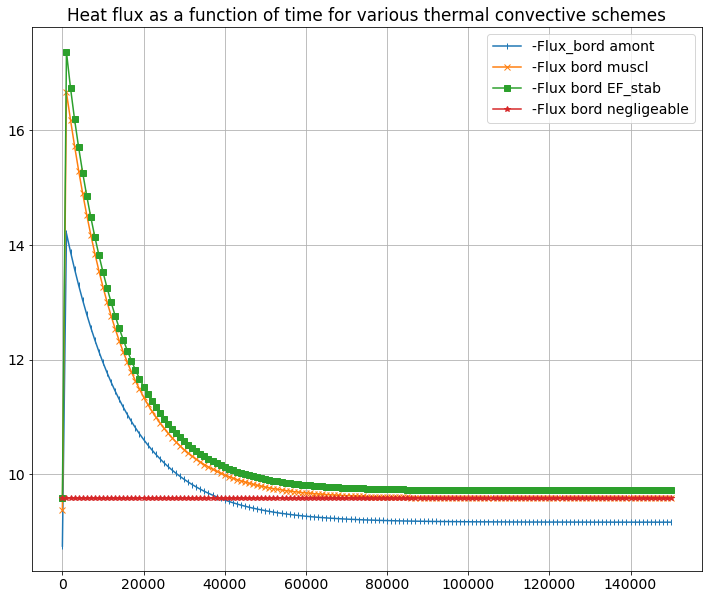

In [6]:
from trustutils.jupyter import plot
import numpy as np 
import matplotlib.pyplot as plt

Graph=plot.Graph("Heat flux as a function of time for various thermal convective schemes")
data=plot.loadText("./Canal_2D_grossier_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-|",label="-Flux_bord amont")
data=plot.loadText("./Canal_2D_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-x",label="-Flux bord muscl")
data=plot.loadText("./Canal_2D_fin_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-s",label="-Flux bord EF_stab")
data=plot.loadText("./Canal_2D_pb2_Puissance_Thermique.out")
Graph.add(data[0],data[1],"-*",label="-Flux bord negligeable")  
Graph.visu()

### Heat flux as a function of time for various thermal convective schemes
The graph below shows the heat flux as a function of time for the various convective schemes studied.They are compared to the real power imposed in the input data set.

The calculation stops when the calculation has reached a stationary sate.

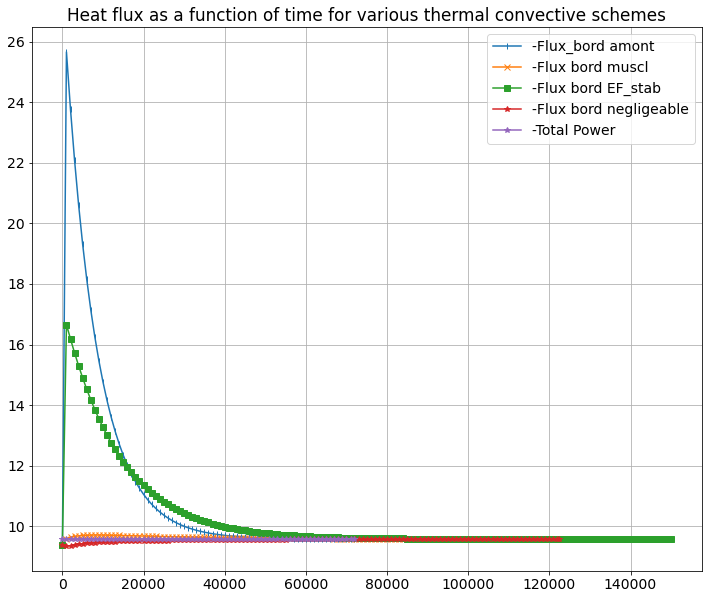

In [7]:
from trustutils.jupyter import plot
import numpy as np 
import matplotlib.pyplot as plt

Graph=plot.Graph("Heat flux as a function of time for various thermal convective schemes")
data=plot.loadText("./Canal_2D_amont_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-|",label="-Flux_bord amont")
data=plot.loadText("./Canal_2D_muscl_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-x",label="-Flux bord muscl")
data=plot.loadText("./Canal_2D_EF_stab_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-s",label="-Flux bord EF_stab")
data=plot.loadText("./Canal_2D_negligeable_pb2_Diffusion_chaleur.out")
Graph.add(data[0],-data[1],"-*",label="-Flux bord negligeable") 
data=plot.loadText("./Canal_2D_amont_pb2_Puissance_Thermique.out")
Graph.add(data[0],data[1],"-*",label="-Total Power") 
Graph.visu()

### Temperature profile in the channel for various meshings
The graph below shows the temperature profiles in the channel for the various meshes studied.  They arecompared to the analytical solution.

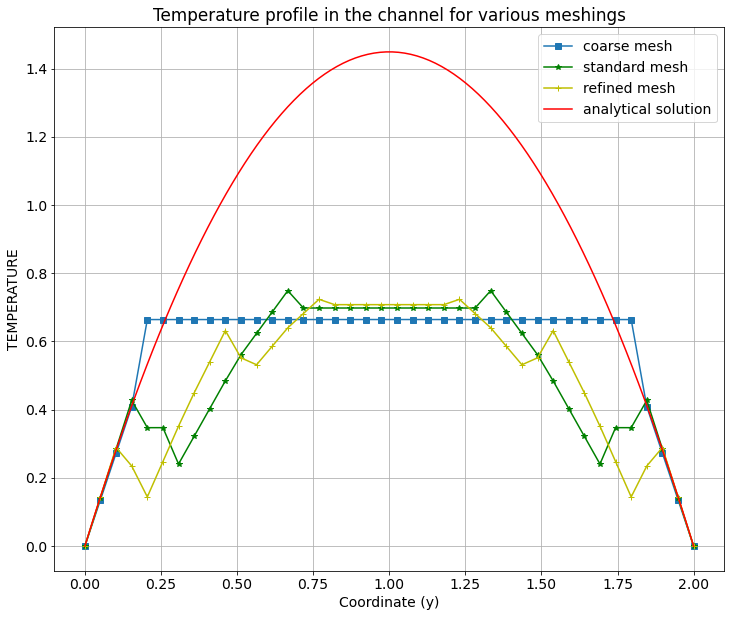

In [8]:
from trustutils.jupyter import plot
import numpy as np 
import matplotlib.pyplot as plt

Graph=plot.Graph("Temperature profile in the channel for various meshings")  
Graph.addSegment("./Canal_2D_grossier_PROF_SORTIE_T.son",label="coarse mesh",marker="-s") 
Graph.addSegment("./Canal_2D_PROF_SORTIE_T.son",label="standard mesh",color="g",marker="-*") 
Graph.addSegment("./Canal_2D_fin_PROF_SORTIE_T.son",label="refined mesh",color="y",marker="-+") 
x=np.linspace(0,2,100)
Graph.add(x,-1/0.344964*x/2.*(x-2),label="analytical solution",color="r")
Graph.visu()

### Temperature profile in the channel
The graph below shows the temperature profiles in the channel for the various convective scheme studied.They are compared to the analytical solution.

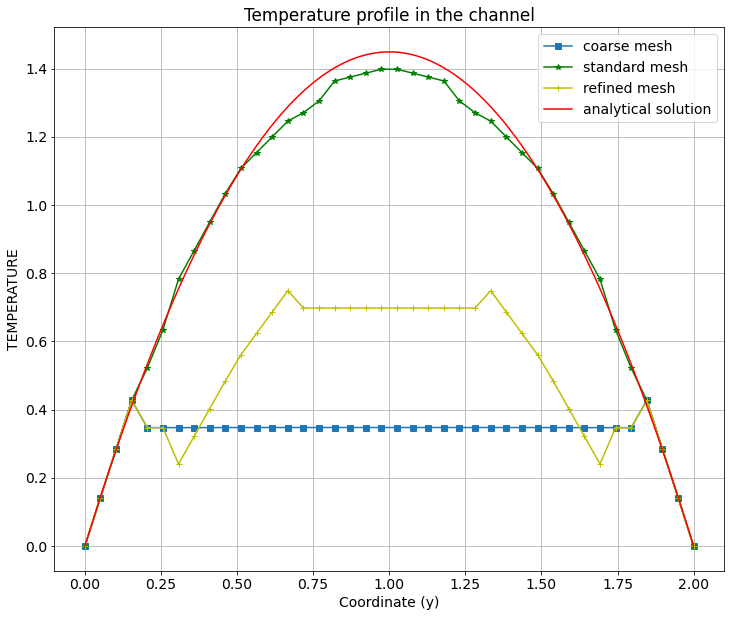

In [9]:
from trustutils.jupyter import plot
import numpy as np 

Graph=plot.Graph("Temperature profile in the channel")  
Graph.addSegment("./Canal_2D_amont_PROF_SORTIE_T.son",label="coarse mesh",marker="-s") 
Graph.addSegment("./Canal_2D_muscl_PROF_SORTIE_T.son",label="standard mesh",color="g",marker="-*") 
Graph.addSegment("./Canal_2D_EF_stab_PROF_SORTIE_T.son",label="refined mesh",color="y",marker="-+") 
x=np.linspace(0,2,100)
Graph.add(x,-1/0.344964*x/2.*(x-2),label="analytical solution",color="r")
Graph.visu()

### Relativ error on the heat flux function of the mesh refinement :  curve

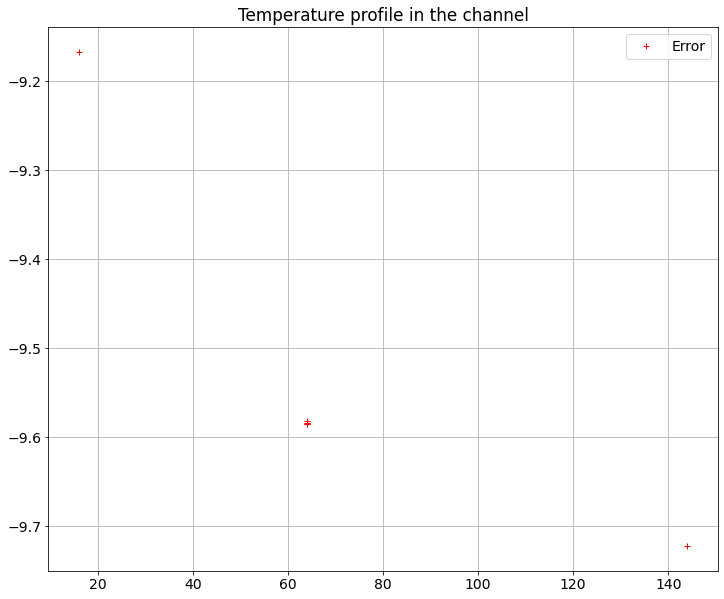

In [10]:
from trustutils.jupyter import plot
import numpy as np 

Graph=plot.Graph("Temperature profile in the channel","Error")   
x=plot.loadText("fin_total")
Graph.add(x[0],x[1],"r+",label="Error")
Graph.visu()

### Relative error on the heat flux function of the mesh refinment :  Table

In [11]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table([ "u_tau","erreur en %"])
data=plot.loadText("./fin_Canal_2D_grossier.out")
data=[data[1],(data[1]+10.)/(10.)*100]
Tableau.addLigne([data],"coarse mesh")

data=plot.loadText("./fin_Canal_2D.out")
data=[data[1],(data[1]+10.)/(10.)*100]
Tableau.addLigne([data],"standard mesh EF_stab")

data=plot.loadText("./fin_Canal_2D_amont.out")
data=[data[1],(data[1]+10.)/(10.)*100]
Tableau.addLigne([data],"standard mesh amont")
 
data=plot.loadText("./fin_Canal_2D_muscl.out")
data=[data[1],(data[1]+10.)/(10.)*100]
Tableau.addLigne([data],"standard mesh muscl")

data=plot.loadText("./fin_Canal_2D_negligeable.out")
data=[data[1],(data[1]+10.)/(10.)*100]
Tableau.addLigne([data],"standard mesh negligeable")

data=plot.loadText("./fin_Canal_2D_fin.out")
data=[data[1],(data[1]+10.)/(10.)*100]
Tableau.addLigne([data],"refined mesh")

Tableau.df

,u_tau,erreur en %
coarse mesh,-9.166946,8.330542
standard mesh EF_stab,-9.583458,4.165415
standard mesh amont,-9.585525,4.144747
standard mesh muscl,-9.584810,4.151904
standard mesh negligeable,-9.581852,4.181481
refined mesh,-9.722338,2.776621
